## Dependency

In [11]:
import sys
sys.path.append('..')
import os
import tensorflow as tf
import hydra
from hydra.core.global_hydra import GlobalHydra
import matplotlib.pyplot as plt

## Load config

In [12]:
# Clear existing Hydra instance
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

# Re-initialize
with hydra.initialize(config_path="../config", version_base=None):
    cfg = hydra.compose(config_name="ner-config.yaml", return_hydra_config=True)
    global_cfg = hydra.compose(config_name="config.yaml")

## Path

In [13]:
root_path = os.path.abspath(os.path.join('..')) 
models_path = os.path.join(root_path, "models")
data_path = os.path.join(root_path, "data", "raw")

## Test

In [14]:
def get_test_dataset(image_size, data_path, batch_size, seed=123, interpolation='bilinear', label_mode="categorical"):
    test_data = tf.keras.utils.image_dataset_from_directory(
        data_path,
        image_size=(image_size, image_size),
        label_mode=label_mode,
        batch_size=batch_size,
        seed=seed,
        interpolation=interpolation
    )
    
    # Normalize the test data
    test_data = test_data.map(lambda x, y: (x / 255.0, y))
    
    return test_data

In [15]:
model_name = f"model_{global_cfg.image_size}.h5"
model_file_path = os.path.join(models_path, model_name)
model = tf.keras.models.load_model(model_file_path)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Model {model_name} loaded.")

Model model_250.h5 loaded.


In [17]:
test_data = get_test_dataset(global_cfg.image_size, data_path, cfg.training.batch_size, seed=global_cfg.SEED)

Found 26179 files belonging to 10 classes.


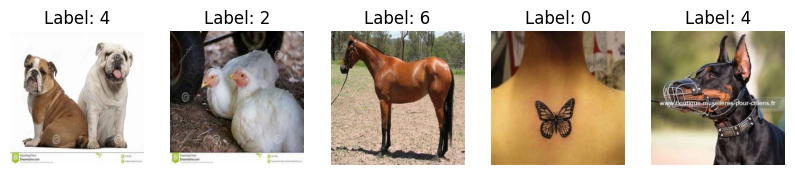

In [18]:
plt.figure(figsize=(10, 10))
for i, (images, labels) in enumerate(test_data.take(1)): 
    for j in range(5): 
        plt.subplot(1, 5, j+1)  
        plt.imshow(images[j])  
        plt.axis('off')  
        plt.title(f"Label: {tf.argmax(labels[j], axis=-1)}")
    break 

plt.show()

In [19]:
loss, accuracy = model.evaluate(test_data)
print(loss, accuracy)

print(f"Accuracy for image size {global_cfg.image_size}: {accuracy * 100:.2f}%")

819/819 ━━━━━━━━━━━━━━━━━━━━ 228s 278ms/step - accuracy: 0.9805 - loss: 0.0834
0.4212509095668793 0.9168417453765869
Accuracy for image size 250: 91.68%
